### О наборе данных

#### Информация о наборе данных
Данный набор данных содержит записи, связанные с ценами акций Microsoft за определенный период. Он включает в себя основные финансовые показатели, такие как цены открытия и закрытия, максимумы и минимумы за день, объем торгов и скорректированные цены закрытия. Набор данных помогает анализировать тенденции цен на акции, волатильность и поведение рынка.

Этот набор данных был синтезирован на основе реальных паттернов фондового рынка, предоставляя возможность для финансового моделирования и прогнозного анализа. Он может быть использован для прогнозирования временных рядов, обнаружения тенденций и корреляционных исследований с внешними рыночными индикаторами.

#### Содержание
Входные переменные:

- Дата: Дата торгов по акциям.
- Open (Открытие): Цена, по которой акции Microsoft открылись в этот день.
- High (Максимум): Наивысшая цена акций, достигнутая в течение торговой сессии.
- Low (Минимум): Наименьшая цена акций, зафиксированная в этот день.
- Close (Закрытие): Цена, по которой акция Microsoft закрылась в конце торговой сессии.
- Adjusted Close (Скорректированная цена закрытия): Цена закрытия, скорректированная с учетом дивидендов и сплитов акций.
- Volume (Объем): Общее количество акций, которые были проданы в течение дня.

#### Благодарности
Этот набор данных является синтезированной версией, основанной на исторических данных фондового рынка. Он предназначен для исследовательских и образовательных целей, помогая пользователям изучать движение цен на акции и рыночные тенденции.

#### Контекст
Движения фондового рынка влияют на множество факторов, включая финансовые показатели компании, экономические индикаторы, настроение инвесторов и глобальные события. Понимание тенденций цен на акции является ключевым для инвесторов, трейдеров и финансовых аналитиков.

Этот набор данных может использоваться для множества аналитических задач, включая прогнозирование временных рядов, анализ волатильности и расчеты технических индикаторов. Пользователи могут исследовать, как акции Microsoft ведут себя с течением времени, и применять методы прогнозного моделирования для предсказания будущих ценовых изменений.

In [1]:
# импорт бибилиотек дл работы с данными
import pandas as pd 
import numpy as np 
# иморт бибилиотек для визуализации 
import matplotlib.pyplot as plt 
import seaborn as sns 
# убираем надоедливые ошибки
import warnings

warnings.filterwarnings('ignore')
# визуализация выбросов
import missingno as mno

In [2]:
# загрузка датафрейма
df = pd.read_csv('Microsoft_Stock.zip')
df.head()

,Date,Open,High,Low,Close,Volume,AdjustedClose,Dividend,SplitCoefficient,DailyReturnPercent
0,2020-01-01,150.56,150.61,150.01,150.14,7878334,151.20,0.0,1.0,0.09
1,2020-01-02,149.83,149.89,149.39,149.64,2780798,150.01,0.0,1.0,-0.33
2,2020-01-03,149.32,150.22,148.76,150.03,11714555,151.22,0.0,1.0,0.26
3,2020-01-04,151.86,152.53,151.67,151.75,24082477,152.38,0.0,1.0,1.15
4,2020-01-05,151.89,153.84,151.13,152.63,43187302,153.35,0.0,1.0,0.58


# EDA (распределения, корреляции, визуализация).


In [3]:
# изменения стиля 
sns.set(style='whitegrid')

In [4]:
# Проверка на уникальные значения в колонке Date
df['Date'].value_counts()

Date
2022-09-26    1
2020-01-01    1
2020-01-02    1
2020-01-03    1
2020-01-04    1
             ..
2020-01-12    1
2020-01-13    1
2020-01-14    1
2020-01-15    1
2020-01-16    1
Name: count, Length: 1000, dtype: int64

In [5]:
# Изменим индекс на дату , т.к. она уникальна
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Volume,AdjustedClose,Dividend,SplitCoefficient,DailyReturnPercent
Date,,,,,,,,,
2020-01-01,150.56,150.61,150.01,150.14,7878334,151.20,0.0,1.0,0.09
2020-01-02,149.83,149.89,149.39,149.64,2780798,150.01,0.0,1.0,-0.33
2020-01-03,149.32,150.22,148.76,150.03,11714555,151.22,0.0,1.0,0.26
2020-01-04,151.86,152.53,151.67,151.75,24082477,152.38,0.0,1.0,1.15
2020-01-05,151.89,153.84,151.13,152.63,43187302,153.35,0.0,1.0,0.58


In [6]:
# проверка на пропуски
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
AdjustedClose         0
Dividend              0
SplitCoefficient      0
DailyReturnPercent    0
dtype: int64


<Axes: >

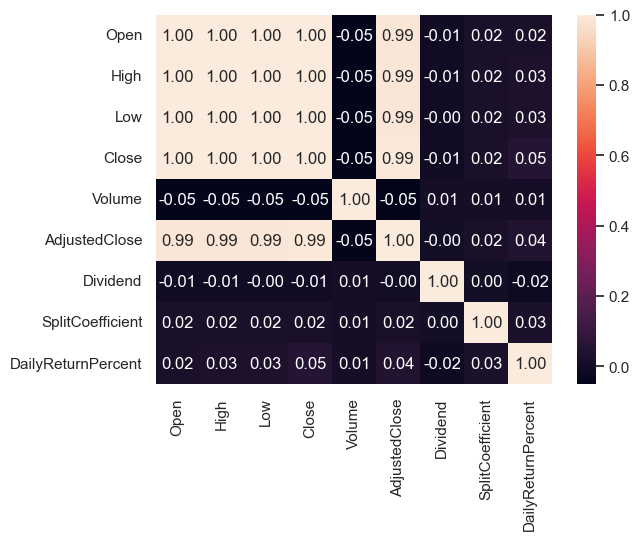

In [7]:
# Матрциа корреляции
sns.heatmap(df.corr(),
            annot= True,
            fmt='.2f')

Создание производных признаков
Замените исходные признаки на более информативные метрики, которые сохранят смысл, но уменьшат избыточность:

Волатильность дня: High - Low
Показывает диапазон колебаний цены.

Ценовое изменение за день: Close - Open
Отражает дневной тренд.

Средняя цена за день: (High + Low) / 2
Альтернатива Open или Close.

Процентное изменение цены: (Close - Open) / Open * 100
Полезно для анализа динамики.

In [8]:
# Добавляем новые признаки , удаляем скоррелированые
data = df.copy()
data['Volatility'] = data['High'] - data['Low']
data['Price_Change'] = data['Close'] - data['Open']
data['Average_Price'] = (data['High'] + data['Low']) / 2
data.drop(['High','Low','Open'], axis = 1,inplace=True)
data.head()

,Close,Volume,AdjustedClose,Dividend,SplitCoefficient,DailyReturnPercent,Volatility,Price_Change,Average_Price
Date,,,,,,,,,
2020-01-01,150.14,7878334,151.20,0.0,1.0,0.09,0.60,-0.42,150.310
2020-01-02,149.64,2780798,150.01,0.0,1.0,-0.33,0.50,-0.19,149.640
2020-01-03,150.03,11714555,151.22,0.0,1.0,0.26,1.46,0.71,149.490
2020-01-04,151.75,24082477,152.38,0.0,1.0,1.15,0.86,-0.11,152.100
2020-01-05,152.63,43187302,153.35,0.0,1.0,0.58,2.71,0.74,152.485


Использование скорректированных цен
Если Adjusted Close почти идентичен Close, оставьте только один из них, но добавьте признак, отражающий их разницу (если она есть):

In [9]:
data['Adjustment_Diff'] = data['AdjustedClose'] - data['Close'] 
data.drop(['AdjustedClose','Close'], axis =1, inplace=True)
data.head()

,Volume,Dividend,SplitCoefficient,DailyReturnPercent,Volatility,Price_Change,Average_Price,Adjustment_Diff
Date,,,,,,,,
2020-01-01,7878334,0.0,1.0,0.09,0.60,-0.42,150.310,1.06
2020-01-02,2780798,0.0,1.0,-0.33,0.50,-0.19,149.640,0.37
2020-01-03,11714555,0.0,1.0,0.26,1.46,0.71,149.490,1.19
2020-01-04,24082477,0.0,1.0,1.15,0.86,-0.11,152.100,0.63
2020-01-05,43187302,0.0,1.0,0.58,2.71,0.74,152.485,0.72


<Axes: >

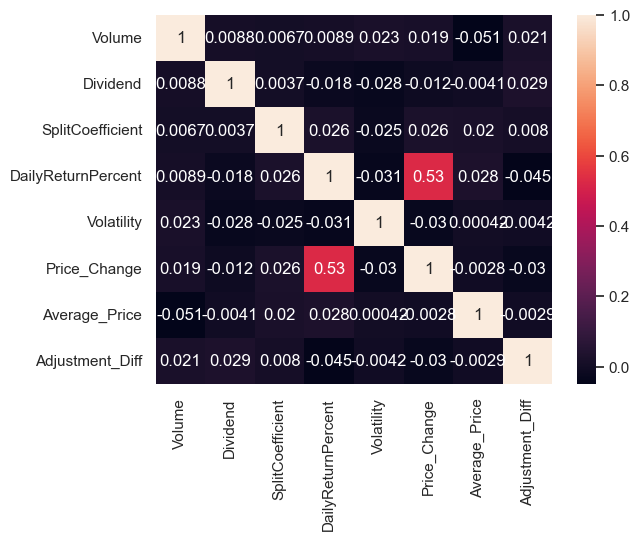

In [10]:
# визуализаия матрици корреляции
sns.heatmap(data.corr(),
            annot=True,
            fmt='.2g')

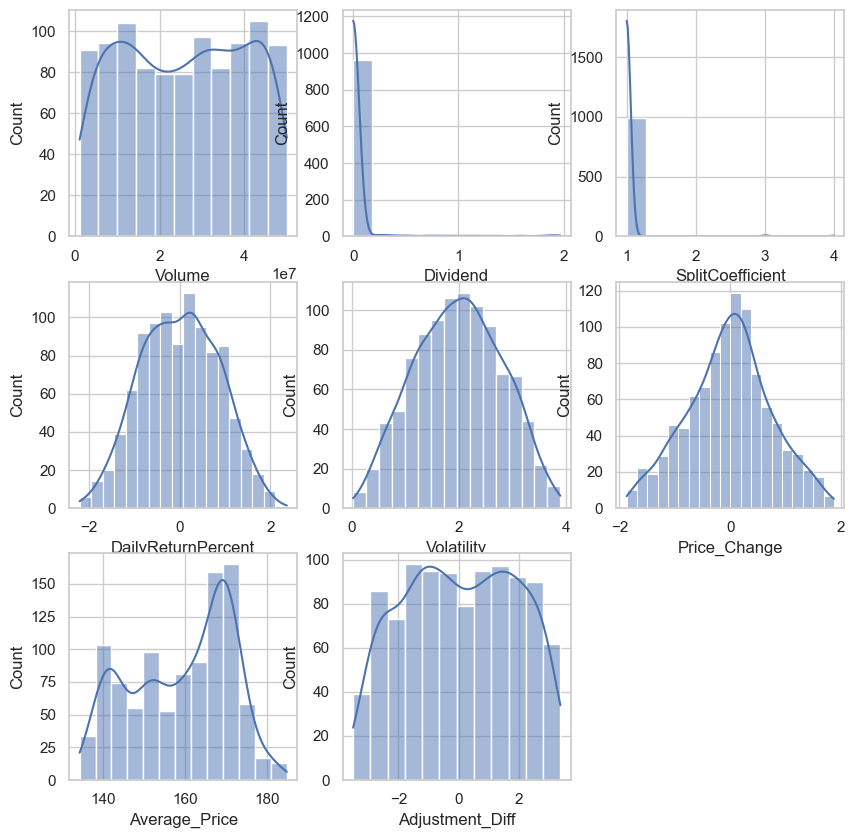

In [11]:
#график распределение данных
plt.figure(figsize=(10,10))
for ind, col in enumerate(data.columns):
    
    plt.subplot(3,3,ind+1)
    sns.histplot(x= data[col],kde=True)

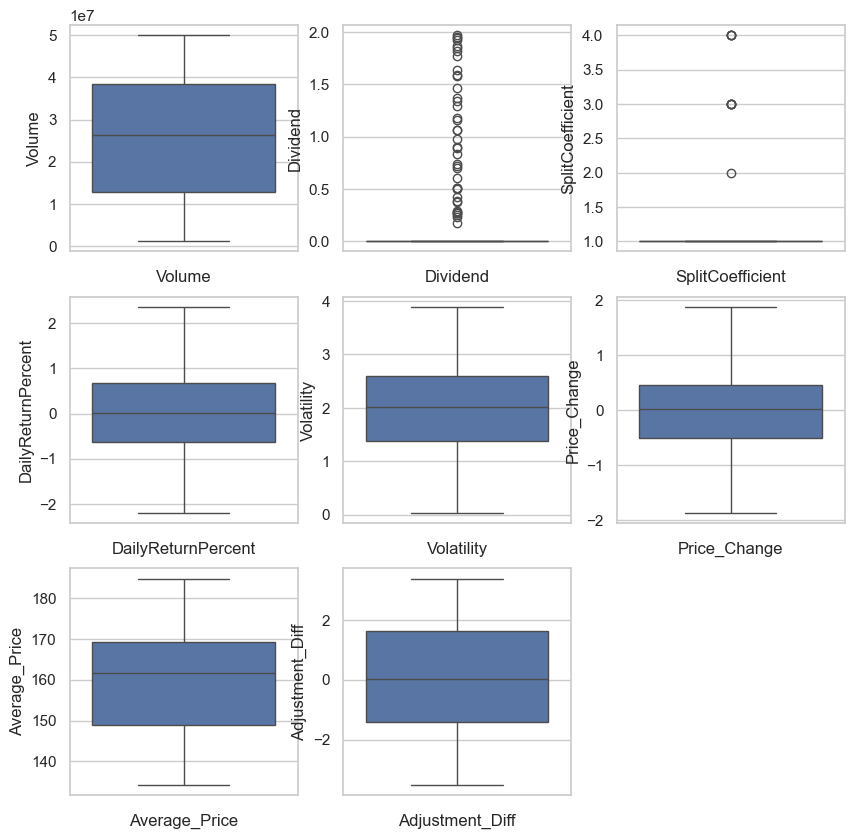

In [12]:
# Визуализируем выбросы 
plt.figure(figsize=(10,10))
for ind,col in enumerate(data.columns):
    plt.subplot(3,3,ind+1)
    sns.boxplot(data[col] )
    plt.xlabel(col)

# Обучение модели

In [56]:
model_score = {}

## Разделение данных на тестовые и обучающие

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [58]:
#разделение данных

X = data.drop('DailyReturnPercent', axis = 1)
y = data['DailyReturnPercent']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.15)

## Линейная Регрессия


In [59]:
linear_model = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

linear_model.fit(X_train,y_train)

LinearRegression()

In [60]:
# Предсказанные значения
y_pred_linear = linear_model.predict(X_test)

In [61]:
# Остатки (разница между реальными и предсказанными значениями)
residuals = y_test - y_pred_linear


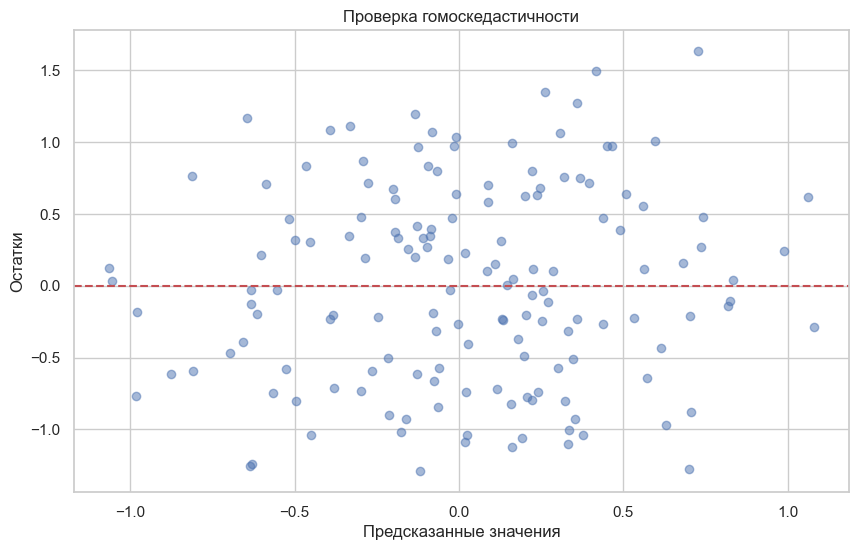

In [62]:


# График остатков vs предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Проверка гомоскедастичности')
plt.show()

In [63]:
# кросссвалидация 
scores = cross_val_score(
    estimator=linear_model,
    X=X,
    y=y,
    cv=kfold,
    scoring='r2'  # Метрика оценки: R²
)
model_score['LinearRegression'] = np.mean(scores)
print("R² scores:", scores)
print("Средний R²:", np.mean(scores))

R² scores: [0.27446252 0.25651327 0.18016541 0.34398506 0.25102181]
Средний R²: 0.2612296152484806


In [66]:
# добавим скалирвоание к нашим данным
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Создаем плайплайн со скалирвоанием
pipe_model_line = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('Regression', LinearRegression()),
        
    ]
)


pipe_model_line.fit(X_test,y_test)
score_linear_pipe = cross_val_score(estimator=pipe_model_line,
                        X=X,
                        y = y,
                        cv= 5)

model_score['Linear Regresson pipline'] = f"r2 score : {r2_score(y_pred=pipe_model_line.predict(X_test), y_true=y_test)}, cv : {score_linear_pipe}"
print("Кросс-валидация балл:", score_linear_pipe)
print("Средний балл кросс-валидации:", score_linear_pipe.mean())
print(f'R2 : {r2_score(y_pred=pipe_model_line.predict(X_test), y_true=y_test)}')

Кросс-валидация балл: [0.27466084 0.24089638 0.18651255 0.25070317 0.3258089 ]
Средний балл кросс-валидации: 0.25571636904841516
R2 : 0.3823784678285943


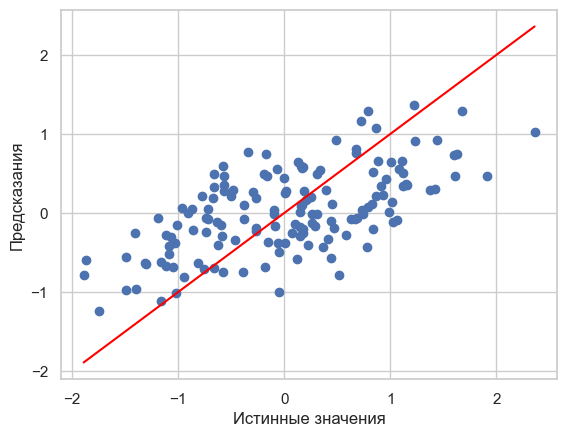

In [65]:
# График предсказаний 
import matplotlib.pyplot as plt

plt.scatter(y_test, pipe_model_line.predict(X_test))
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

## попробуем другую модель , например  RandomForestRegressor

In [67]:

from sklearn.ensemble import RandomForestRegressor

RFR_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ("RFR", RandomForestRegressor(random_state=42))
    ]
)


RFR_pipe.fit(X_train, y_train)



score_RFR_pipe = cross_val_score(estimator=RFR_pipe,
                        X=X,
                        y = y,
                        cv= 5)

model_score['Random Forest Regressor'] = f'r2 score: {r2_score(y_pred=RFR_pipe.predict(X_test), y_true=y_test)}, cv : {score_RFR_pipe}'
print("Кросс-валидация балл:", score_RFR_pipe)
print("Средний балл кросс-валидации:", score_RFR_pipe.mean())
print(f'R2 : {r2_score(y_pred=RFR_pipe.predict(X_test), y_true=y_test)}')

Кросс-валидация балл: [0.23693215 0.15808349 0.0749983  0.16039754 0.34136176]
Средний балл кросс-валидации: 0.19435464865501587
R2 : 0.31065932145725783


In [ ]:
# подбор параметров
from sklearn.model_selection import GridSearchCV
params_RFR = {
    'RFR__max_depth': [1, 2, 3, 5, 6, 7, 8, 9, 10],
    'RFR__max_leaf_nodes': [1, 2, 3],
    'RFR__n_estimators': [100, 200, 300, 400, 500],
    'RFR__min_samples_leaf': [1, 2, 3, 4, 5],
}

search_RFR = GridSearchCV(
    estimator=RFR_pipe,
    param_grid=params_RFR,
    scoring='r2',
    cv=5
)

search_RFR.fit(X_train,y_train)


print("Best params :", search_RFR.best_params_)
print(' Best Score :' ,{search_RFR.best_score_})

score_RFR_gs = cross_val_score(estimator=search_RFR,
                        X=X,
                        y = y,
                        cv= 5)

print("Кросс-валидация балл:", score_RFR_gs)
print("Средний балл кросс-валидации:", score_RFR_gs.mean())
print(f'R2 : {r2_score(y_pred=search_RFR.predict(X_test), y_true=y_test)}')

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, search_RFR.best_estimator_.predict(X_test), alpha=0.5, label=f'Random Forest Regression (R² = {r2_score(y_test,
                                                                                                                            search_RFR.best_estimator_.predict(X_test)):.2f})')
plt.title('Фактические vs Предсказанные значения')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")

# Линия идеальных предсказаний
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         linewidth=2,
         label='Идеальные предсказания')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## а теперь решающие деревья

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('DecisionTree', DecisionTreeRegressor())
    ]
)
DTR_pipe.fit(X_train,y_train)


print("Кросс-валидация балл:", score)
print("Средний балл кросс-валидации:", score.mean())
print(f'R2 : {r2_score(y_pred=DTR_pipe.predict(X_test), y_true=y_test)}')

Pipeline(steps=[('Scaler', StandardScaler()),
                ('DecisionTree', DecisionTreeRegressor())])

In [ ]:
params = {
    'DecisionTree__max_depth': [1, 2, 3, 5, 6, 7, 8, 9, 10],
    'DecisionTree__max_leaf_nodes': [1, 2, 3],
    'DecisionTree__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  
}
search_DTR = GridSearchCV(
    estimator=DTR_pipe,
    param_grid=params,
    scoring='r2',
    cv=5
)
search_DTR.fit(X_train,y_train)

print("Лучшие параметры :", search_DTR.best_params_)
print(' Лучший результат :' ,{search_DTR.best_score_})


score = cross_val_score(estimator=DTR_pipe,
                        X=X_test,
                        y = y_test,
                        cv= 5)
print("Кросс-валидация балл:", score)
print("Средний балл кросс-валидации:", score.mean())
print(f'R2 : {r2_score(y_pred=search_DTR.predict(X_test), y_true=y_test)}')


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('DecisionTree',
                                        DecisionTreeRegressor())]),
             param_grid={'DecisionTree__max_depth': [1, 2, 3, 5, 6, 7, 8, 9,
                                                     10],
                         'DecisionTree__max_leaf_nodes': [1, 2, 3],
                         'DecisionTree__min_weight_fraction_leaf': [0.0, 0.1,
                                                                    0.2, 0.3,
                                                                    0.4, 0.5]},
             scoring='r2')

Кросс-валидация балл: [-1.01170002 -0.43636733 -0.34826609 -0.51197116 -0.25665124]
Средний балл кросс-валидации: -0.5129911666502673
R2 : 0.23706021983546266


## Градиентный бустинг

In [47]:
# Пример улучшения R² для Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA



GBR_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('PCA', PCA(n_components=5)),
        ('GBR', GradientBoostingRegressor(n_estimators=300, max_depth=5, learning_rate=0.1))
    ]
)
GBR_pipe.fit(X_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()), ('PCA', PCA(n_components=5)),
                ('GBR',
                 GradientBoostingRegressor(max_depth=5, n_estimators=300))])

In [48]:
y_pred = GBR_pipe.predict(X_test)
print("R²:", r2_score(y_test, y_pred))

R²: -0.06916351173996826


In [50]:
params =  {
    "PCA__n_components" : [1, 2, 3, 4 ,5 ],
    'GBR__n_estimators': [500, 700, 1000],  # Увеличить количество деревьев
    'GBR__learning_rate': [0.005, 0.01, 0.02],  # Эксперименты с низким lr
    'GBR__max_depth': [3, 4, 5],  # Проверить большую глубину
    'GBR__subsample': [0.7, 0.8, 0.9],
    'GBR__max_features': [None, 0.8, 'sqrt'],
    'GBR__min_samples_split': [2, 5, 10],  # Увеличить для борьбы с переобучением
    'GBR__min_samples_leaf': [1, 2, 4],
    'GBR__ccp_alpha': [0.0, 0.001, 0.01]  # Добавить обрезку
}


search = GridSearchCV(
    estimator= GBR_pipe,
    param_grid=params,
    scoring ='r2',
    cv = 5,
    n_jobs=-1,
    verbose=2
)
search.fit(X_train, y_train)

# Лучшая модель
best_model = search.best_estimator_
best_r2 = r2_score(y_test, best_model.predict(X_test))
print(f"\nBest parameters: {search.best_params_}")
print(f"Optimized R²: {best_r2:.4f}")


Fitting 5 folds for each of 32805 candidates, totalling 164025 fits

Best parameters: {'GBR__ccp_alpha': 0.01, 'GBR__learning_rate': 0.02, 'GBR__max_depth': 4, 'GBR__max_features': None, 'GBR__min_samples_leaf': 4, 'GBR__min_samples_split': 10, 'GBR__n_estimators': 1000, 'GBR__subsample': 0.7, 'PCA__n_components': 5}
Optimized R²: 0.2097
